<h1> Lecture 7: Poisson Distribution </h1>

In [27]:
import random
import numpy as np
from math import ceil

#--------------------------------------------------------------------------------------------------------------
# This method generate pseudo-random numbeers between 0 and 1 with uniform distribution initialized by a seed 
#--------------------------------------------------------------------------------------------------------------


def rand_uniform(N, seed = 0.):

    if seed != 0. : random.seed(float(seed))
    randlist = []
    for i in range (0,N):
        
        randlist.append(random.random())
    return randlist

#-------------------------------------------------------------------------------------------------------------------
# This method generate pseudo-random numbers that follow an exponential pdf using the inverse function algorithm
#-------------------------------------------------------------------------------------------------------------------

def generate_exp(tau,N,seed=0.):
    
    if tau <= 0 : raise ValueError('Tau must be a positive number')
    f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
    y = rand_uniform(N,seed)
    return list(map(f,y)) 

#---------------------------------------------------------------------------------------------------------------
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
#---------------------------------------------------------------------------------------------------------------

def sturges(N_events):
    
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# ---------------------------------------------------------------------------------------------------------------
#this method  generate a single event that follow an exponential pdf
#---------------------------------------------------------------------------------------------------------------

def rand_exp(tau,seed = 0.):
     
     if tau <= 0 : raise ValueError('Tau must be a positive number')
     if seed != 0. : random.seed(float(seed))
     y = random.random()
     f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
     return f(y)

# ---------------------------------------------------------------------------------------------------------------
#Generating a pseduo random number that follow Poisson Distribution from exponential pdf with lambda fixed at 1
#---------------------------------------------------------------------------------------------------------------

def rand_poisson(mean, tau = 1.):

    total_time = rand_exp(tau)
    events  = 0 
    while total_time < mean :
        events += 1
        total_time += rand_exp(tau)
    return events 

# ---------------------------------------------------------------------------------------------------------------
# this method generate a set of random numbers that follow the poisson pdf
#-----------------------------------------------------------------------------------------------------------------

def generate_poisson(mean,N,tau = 1.,seed = 0.):
    
    if seed != 0. : random.random(float(seed))
    randlist = []

    for i in range(N):
        randlist.append(rand_poisson(mean,tau))
    
    return randlist 
    
#----------------------------------------------------------------------------------------------------------------        
# this method calculate the airthmetic mean of a sample
#---------------------------------------------------------------------------------------------------------------

def mu(sample):
    
    s = np.sum(sample)
    mu = s/len(sample)
    return mu

#----------------------------------------------------------------------------------------------------------------
#this metheod calculate the variance of a sample
#---------------------------------------------------------------------------------------------------------------

def quadratic_sigma(sample):
   
    var = np.sum((sample-mu(sample))**2)/(len(sample))
    return var

#----------------------------------------------------------------------------------------------------------------
#this method calculate the standard deviation of a sample
#---------------------------------------------------------------------------------------------------------------

def sigma(sample):
    
    dev  = np.sqrt(quadratic_sigma(sample))
    return dev

#---------------------------------------------------------------------------------------------------------------
#
#---------------------------------------------------------------------------------------------------------------

def skewness(sample):
    
    cube = np.sum((sample - mu(sample))**3)
    N = len(sample) 
    varcube = sigma(sample)**3
    skew = cube/(N*varcube)

    return skew 

#---------------------------------------------------------------------------------------------------------------
#
#---------------------------------------------------------------------------------------------------------------

def kurtosis(sample):
    
    quartic = np.sum((sample - mu(sample))**4)
    N = len(sample) 
    varquartic = sigma(sample)**4
    kurt = quartic/(N*varquartic)-3

    return kurt 



#---------------------------------------------------------------------------------------------------------------
#
#---------------------------------------------------------------------------------------------------------------
def momenta(sample):
    
    return [mu(sample),quadratic_sigma(sample),sigma(sample),skewness(sample),kurtosis(sample)]



# note: by default we consider the bessel correction in the calculation of momenta, it would be more efficient
# the implemenation if it could be possible to choose to use it or not.
    

<h3> Exercise 7.1 </h3>
<p> Generate a sample of pseudo-random numbers distributed according to an exponential density distribution with a characteristic time t0 of 5 seconds.
<uL>
<li>Visualize the distribution of the obtained sample in a histogram using the inverse function method.</li>
<li>Write all functions responsible for random number generation in a library, implemented in separate files from the main program.</li>
</ul>

(array([1200., 1068.,  914.,  768.,  724.,  640.,  592.,  481.,  457.,
         413.,  304.,  320.,  255.,  201.,  190.,  171.,  147.,  154.,
         129.,   99.,   84.,   91.,   70.,   74.,   56.,   52.,   49.,
          49.,   37.,   28.,   18.]),
 array([ 0.        ,  0.64516129,  1.29032258,  1.93548387,  2.58064516,
         3.22580645,  3.87096774,  4.51612903,  5.16129032,  5.80645161,
         6.4516129 ,  7.09677419,  7.74193548,  8.38709677,  9.03225806,
         9.67741935, 10.32258065, 10.96774194, 11.61290323, 12.25806452,
        12.90322581, 13.5483871 , 14.19354839, 14.83870968, 15.48387097,
        16.12903226, 16.77419355, 17.41935484, 18.06451613, 18.70967742,
        19.35483871, 20.        ]),
 <BarContainer object of 31 artists>)

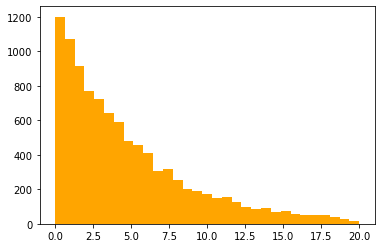

In [28]:
import matplotlib.pyplot as plt

tau = 5

randlist = generate_exp(tau,10000)

nBins = sturges(randlist)

bin_edges = np.linspace(0.,4*tau,nBins )

plt.hist(randlist,bins = bin_edges, color = 'orange')



<h3> Exercise 7.2 </h3>
<p>Use the result from the first exercise to simulate a countng experiment with Poisson characteristics:
<ul>
<li>Choose a characteristic time t0 for a radioactive decay process;</li>

<li>Choose a measurement time tM for the counting window;</li>

<li>In a loop, simulate N pseudo-experiments of counting, where, for each of them, a sequence of random events is generated with an intertime characteristic of Poisson phenomena, until the total time elapsed is greater than the measurement time, counting the number of generated events that fall within the interval.</li>

</ul>
Fill a histogram with the simulated counts for each experiment. </p>

(array([3306., 3709., 1987.,  719.,  270.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

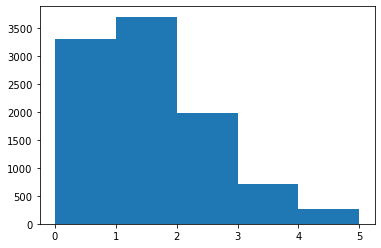

In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
from math import ceil

    

t0 = 55 # time in seconds of decaying for Thoron an isotope of radon

tm = 60 # time of measurament in second

N = 10000
randlist = []


for i in range(N):

    total_time = rand_exp(t0) # if the seed is not specified is change in every iteration 
    events = 0
    
    while (total_time < tm):
        events += 1
        total_time += rand_exp(t0)
    randlist.append(events)
        
    


Nbins = sturges(randlist)

xMin = max(0., ceil(np.mean(randlist)-3*(np.var(randlist))**0.5))
xMax = ceil(np.mean(randlist)+ 3*(np.var(randlist))**0.5)



bin_edges = np.linspace(xMin,xMax, int(xMax - xMin) + 1 )
#bin_edges  = np.linspace(min(randlist),max(randlist), int(max(randlist) - min(randlist))+1)


plt.hist(randlist,bins = bin_edges)


<h3> Exercise 7.3 </h3>
<p>Use the source code written in the previous exercise to add to the library developed for exercise 1 a function that generates random numbers according to the Poisson distribution, with the mean expected events as an input parameter.
<ul>
<li>Rewrite the previous exercise using this function, also drawing the probability density histogram.</li>

<li>Calculate the sample statistics (mean, variance, skewness, kurtosis) from the input list using a library.</li>

<li>Use the generated sample to test the functionality of the library.</li>
</ul> </p>

the kurtosis of the pdf is: 0.204198591750004
the skewness of the pdf is: 0.472180007764306
the mean of the pdf is: 3.981
the variance of the pdf is: 3.905239
the standarrd deviation of the pdf is: 1.976167756036921
[3.981, 3.905239, 1.976167756036921, 0.4721800077643059, 0.20419859175000443]


(array([ 189.,  729., 1457., 1959., 1998., 1549., 1060.,  577.,  293.,
         166.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

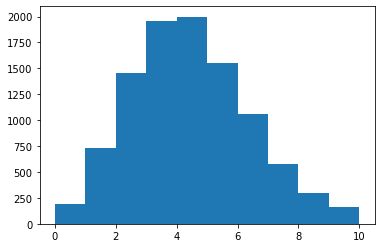

In [30]:
import scipy.stats as stats

poisson = generate_poisson(220,10000,55)
    
Nbins = sturges(poisson)

xMin = max(0., ceil(np.mean(poisson)-3*(np.var(poisson))**0.5))
xMax = ceil(np.mean(poisson)+ 3*(np.var(poisson))**0.5)



bin_edges = np.linspace(xMin,xMax, int(xMax - xMin) + 1 )

kurt  = stats.kurtosis(poisson)
skew = stats.skew(poisson)
mean = np.mean(poisson)
variance = np.var(poisson)
std = np.std(poisson)

print('the kurtosis of the pdf is: ' + str(kurt) )
print('the skewness of the pdf is: ' + str(skew) )
print('the mean of the pdf is: ' + str(mean))
print('the variance of the pdf is: ' + str(variance))
print('the standarrd deviation of the pdf is: ' + str(std))
print(momenta(poisson))



plt.hist(poisson,bins = bin_edges)
    

<h3> Exercise 7.4 </h3>

<p>
<ul>
<li>Use the result from the previous exercise to calculate the statistics of a Poisson distribution varying the mean, from 1 to 250 (how should you sample the interval?). </li>

<li>Plot the obtained behavior of skewness and kurtosis as function of the Poisson mean. </li>
</ul>
</p>

TypeError: 'Text' object is not callable

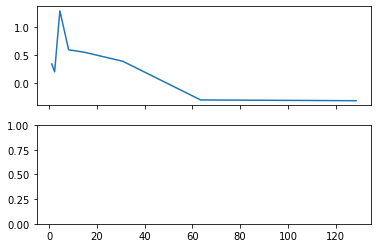

In [45]:
mean = []
skew = []
kurt = []
mean_min = 1
mean_max  = 250
while mean_min < mean_max:
    mean.append(mu(generate_poisson(mean_min,50)))
    
    skew.append(skewness(generate_poisson(mean_min,50)))
    kurt.append(kurtosis(generate_poisson(mean_min,50)))
    mean_min *=2

fig, (ax1,ax2) = plt.subplots(2,sharex = True)
fig.suptitle('Poissonon distribution asymptotic behaviour')

ax1.plot(mean,skew)
ax1.set_xlabel('Mean')
ax1.set_ylabel('Skewness')

ax2.plot(mean,kurt)
ax2.set_xlabel('Mean')
ax2.set_ylabel('Kurtosis')
